In [1]:
import spacy
import pandas as pd

In [3]:
true_df = pd.read_csv('/kaggle/input/news-data/True.csv')
fake_df = pd.read_csv('/kaggle/input/news-data/Fake.csv')

In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df.drop(columns = ['title', 'subject', 'date'], inplace = True)
fake_df.drop(columns = ['title', 'subject', 'date'], inplace = True)

In [8]:
true_df.columns

Index(['text'], dtype='object')

In [9]:
fake_df.columns

Index(['text'], dtype='object')

In [10]:
true_df.isnull().sum()

text    0
dtype: int64

In [11]:
fake_df.isnull().sum()

text    0
dtype: int64

In [12]:
true_df.head()

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [13]:
fake_df.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [14]:
true_df['label'] = 1
fake_df['label'] = 0

In [15]:
true_df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [16]:
fake_df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [17]:
true_df.shape, fake_df.shape

((21417, 2), (23481, 2))

In [18]:
true = true_df.iloc[:2000]
fake = fake_df.iloc[:2000]

In [19]:
true.shape, fake.shape

((2000, 2), (2000, 2))

In [20]:
df = pd.concat([true, fake], axis = 0)

In [21]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [22]:
df.shape

(4000, 2)

In [23]:
nlp = spacy.load('en_core_web_sm')

In [26]:
def lemmatisation(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [27]:
df['lemma'] = df['text'].apply(lemmatisation)

In [28]:
def remove_stopwords(text):
    doc = nlp(text)
    final = [word.text for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(final)

In [29]:
df['res'] = df['lemma'].apply(remove_stopwords)

In [30]:
df.head()

,text,label,lemma,res
0,WASHINGTON (Reuters) - The head of a conservat...,1,WASHINGTON ( Reuters ) - the head of a conserv...,WASHINGTON Reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,1,WASHINGTON ( Reuters ) - Transgender people wi...,WASHINGTON Reuters Transgender people allow ti...
2,WASHINGTON (Reuters) - The special counsel inv...,1,WASHINGTON ( Reuters ) - the special counsel i...,WASHINGTON Reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,WASHINGTON ( Reuters ) - trump campaign advise...,WASHINGTON Reuters trump campaign adviser Geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,SEATTLE / WASHINGTON ( Reuters ) - President D...,SEATTLE WASHINGTON Reuters President Donald Tr...


In [31]:
x = df['res']
y = df['label']

In [32]:
x.head()

0    WASHINGTON Reuters head conservative republica...
1    WASHINGTON Reuters Transgender people allow ti...
2    WASHINGTON Reuters special counsel investigati...
3    WASHINGTON Reuters trump campaign adviser Geor...
4    SEATTLE WASHINGTON Reuters President Donald Tr...
Name: res, dtype: object

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('vectorizer_tfidf' , TfidfVectorizer()),
    ('Random_Forest', RandomForestClassifier(n_jobs = 1, random_state = 42))
])

classifier.fit(x_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random_Forest',
                 RandomForestClassifier(n_jobs=1, random_state=42))])

In [35]:
classifier.score(x_test, y_test)*100

99.625

In [36]:
pred = classifier.predict(x_test)

In [37]:
pred[:5]

array([1, 0, 1, 0, 0])

In [38]:
y_test[:5]

555     1
1491    0
527     1
1925    0
989     0
Name: label, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Model Accuracy: {accuracy_score(y_test,pred)*100}')

Model Accuracy: 99.625


In [40]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       378
           1       1.00      1.00      1.00       422

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Text(0.5, 1.0, 'CONFUSION MATRIX FOR FAKE NEWS DETECTION')

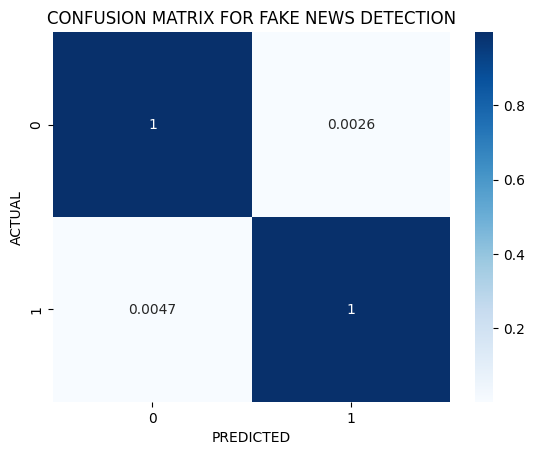

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX FOR FAKE NEWS DETECTION')